# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")

In [3]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
data.dropna(inplace = True)

In [8]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [9]:
data.corr()

C:\Users\thiru\AppData\Local\Temp/ipykernel_28956/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


C:\Users\thiru\AppData\Local\Temp/ipykernel_28956/3916738982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

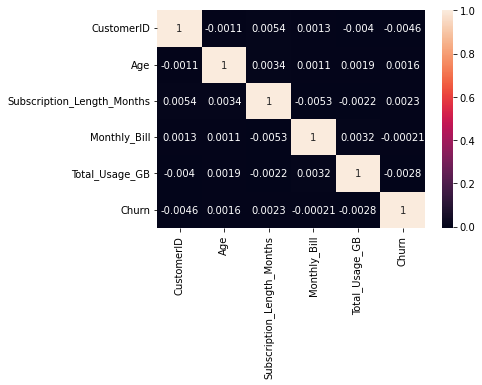

In [10]:
sns.heatmap(data.corr(),annot = True)

# Encode Categorical Labels:

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Location'] = encoder.fit_transform(data['Location'])

In [13]:
data = data.drop(columns = ['CustomerID','Name'])

<Axes: ylabel='Frequency'>

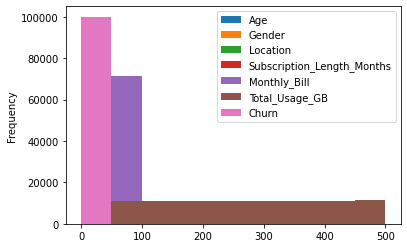

In [32]:
data.plot.hist()

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[ 1.24167039  1.00432937  0.00294695 ...  0.41060598 -0.29428898
  -0.99558973]
 [ 1.17622625 -0.99568929  1.41974758 ... -0.80537409 -0.78485174
  -0.99558973]
 [-1.31065114 -0.99568929  0.00294695 ...  1.0092043   1.42268068
  -0.99558973]
 ...
 [ 1.30711454  1.00432937 -1.41385369 ...  1.5351404  -0.17931334
   1.00442981]
 [ 0.45634069 -0.99568929  1.41974758 ... -0.78115335  1.22338955
   1.00442981]
 [-1.11431871 -0.99568929  0.00294695 ...  0.56927655 -0.7771867
   1.00442981]]


In [15]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values

In [16]:
X

array([[ 63.  ,   1.  ,   2.  ,  17.  ,  73.36, 236.  ],
       [ 62.  ,   0.  ,   4.  ,   1.  ,  48.76, 172.  ],
       [ 24.  ,   0.  ,   2.  ,   5.  ,  85.47, 460.  ],
       ...,
       [ 64.  ,   1.  ,   0.  ,  17.  ,  96.11, 251.  ],
       [ 51.  ,   0.  ,   4.  ,  20.  ,  49.25, 434.  ],
       [ 27.  ,   0.  ,   2.  ,  19.  ,  76.57, 173.  ]])

In [17]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Splitting the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

# Feature Scaling

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Apply Logistic algorithm:

In [20]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
y_pred = regressor.predict(X_test_scaled)

In [22]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 1]
 [0 1]
 [1 1]]


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred)*100,'%')

50.11 %


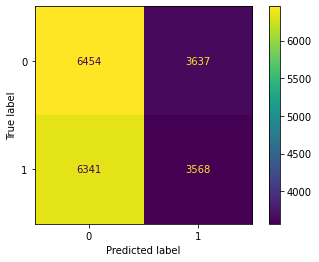

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict = True)
data_report = pd.DataFrame(report).transpose()
data_report

,precision,recall,f1-score,support
0,0.504416,0.639580,0.564013,10091.0000
1,0.495212,0.360077,0.416969,9909.0000
accuracy,0.501100,0.501100,0.501100,0.5011
macro avg,0.499814,0.499828,0.490491,20000.0000
weighted avg,0.499856,0.501100,0.491160,20000.0000


# Hyperparameter 

In [26]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'] 
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\thiru\AppData\Local\Programs\Pyth

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [28]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


# Cross Validation:

In [29]:
best_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [31]:
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Mean Accuracy: 0.499275
Standard Deviation of Accuracy: 0.0028302495473014177
